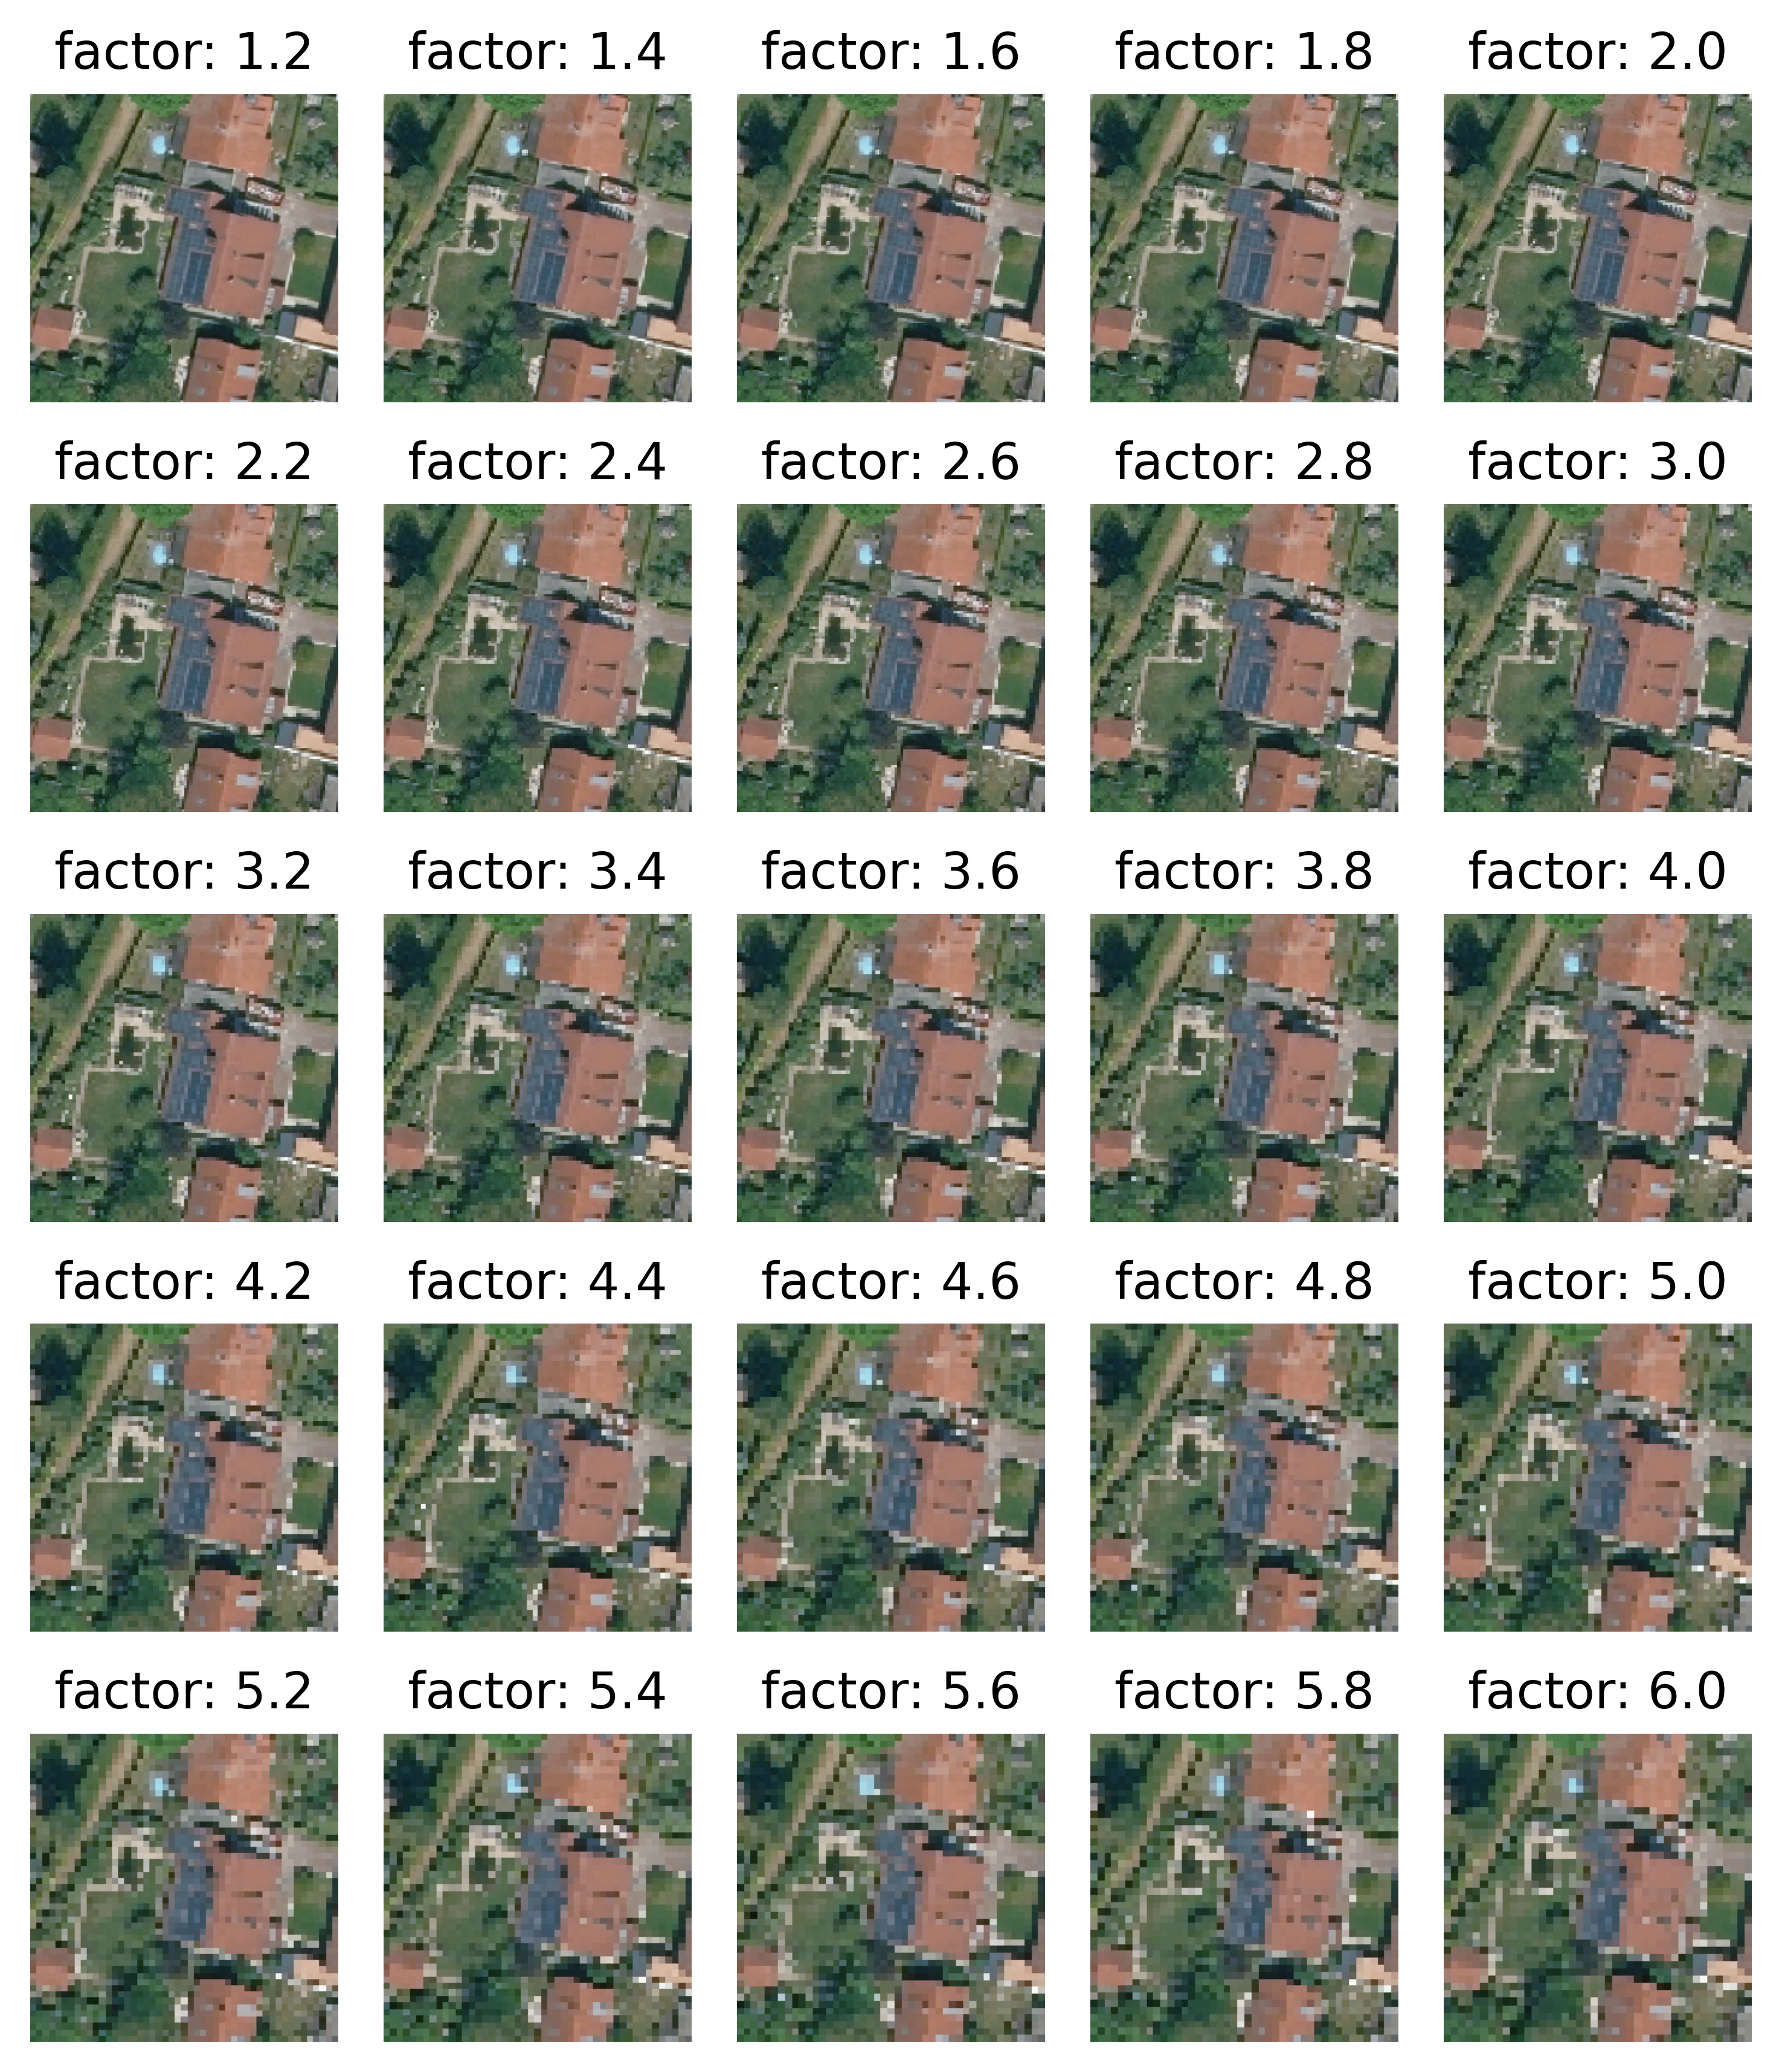

In [1]:
# create images with different resampling factors
from PIL import Image
import numpy as np
im  = Image.open("resampling.png") 
from torchvision.transforms.functional import InterpolationMode
from torchvision import transforms

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'font.size' : 8,
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

fig, axs = plt.subplots(nrows=5, ncols=5)

fig.set_figwidth(6)
fig.set_figheight(7)
fig.set_dpi(500)
fig.set_tight_layout(True)


x, y = 0,0
for i, fact in enumerate(np.arange(1.2, 6.2, 0.2)):
    out = im.copy()
    new_size = int(256 // fact)

    downsampler = transforms.Resize(size=(new_size,new_size), interpolation=InterpolationMode.NEAREST)
    upsampler = transforms.Resize(size=(256, 256), interpolation=InterpolationMode.NEAREST)
        
    downsampled_image = downsampler.forward(out)
    transformed_image = upsampler.forward(downsampled_image)
    
    axs[x, y].imshow(transformed_image)
    axs[x, y].set_title(f"factor: {fact:.1f}")
    axs[x, y].axis('off')
    y += 1
    if y == 5:
        y = 0
        x += 1
    

fig.tight_layout()
# fig.savefig("resampling_with_factors.pgf")
fig.savefig("resampling_with_factors.png")

# for fact in np.arange(1.0, 6.2, 0.2):
#     out = im.copy()
#     new_size = int(256 // fact)

#     downsampler = transforms.Resize(size=(new_size,new_size), interpolation=InterpolationMode.NEAREST)
#     upsampler = transforms.Resize(size=(256, 256), interpolation=InterpolationMode.NEAREST)
        
#     downsampled_image = downsampler.forward(out)
#     transformed_image = upsampler.forward(downsampled_image)


#     transformed_image.save("resampling_%f.png" % fact)